In [ ]:
# Run this cell and select the kaggle.json file downloaded from tha Kaggle account settings page
from google.colab import files
files.upload()

In [ ]:
# Nexxt install the Kaggle API client.
!pip install -q kaggle

In [ ]:
#The Kaggle API client expects this file to be in ~/.kaggle, so move it there
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#This permission change avoids a warning on Kaggşe tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Creating directory and changing the current working directory
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


In [ ]:
#Searching for dataset
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         126236       1176  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          16019        297  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1615         33  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

In [ ]:
# Downloading dataset and coming out of directory
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
100% 609M/612M [00:21<00:00, 32.6MB/s]
100% 612M/612M [00:21<00:00, 30.1MB/s]
/content


In [ ]:
# Unzipping downloaded file and removing unusable file
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm -rf traffic_sign_dataset/Meta.csv

Streaming output truncated to the last 5000 lines.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traffic_sign

In [ ]:
!pip install tensorflow --upgrade


In [ ]:
!pip install keras --upgrade

In [ ]:
#Importing libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

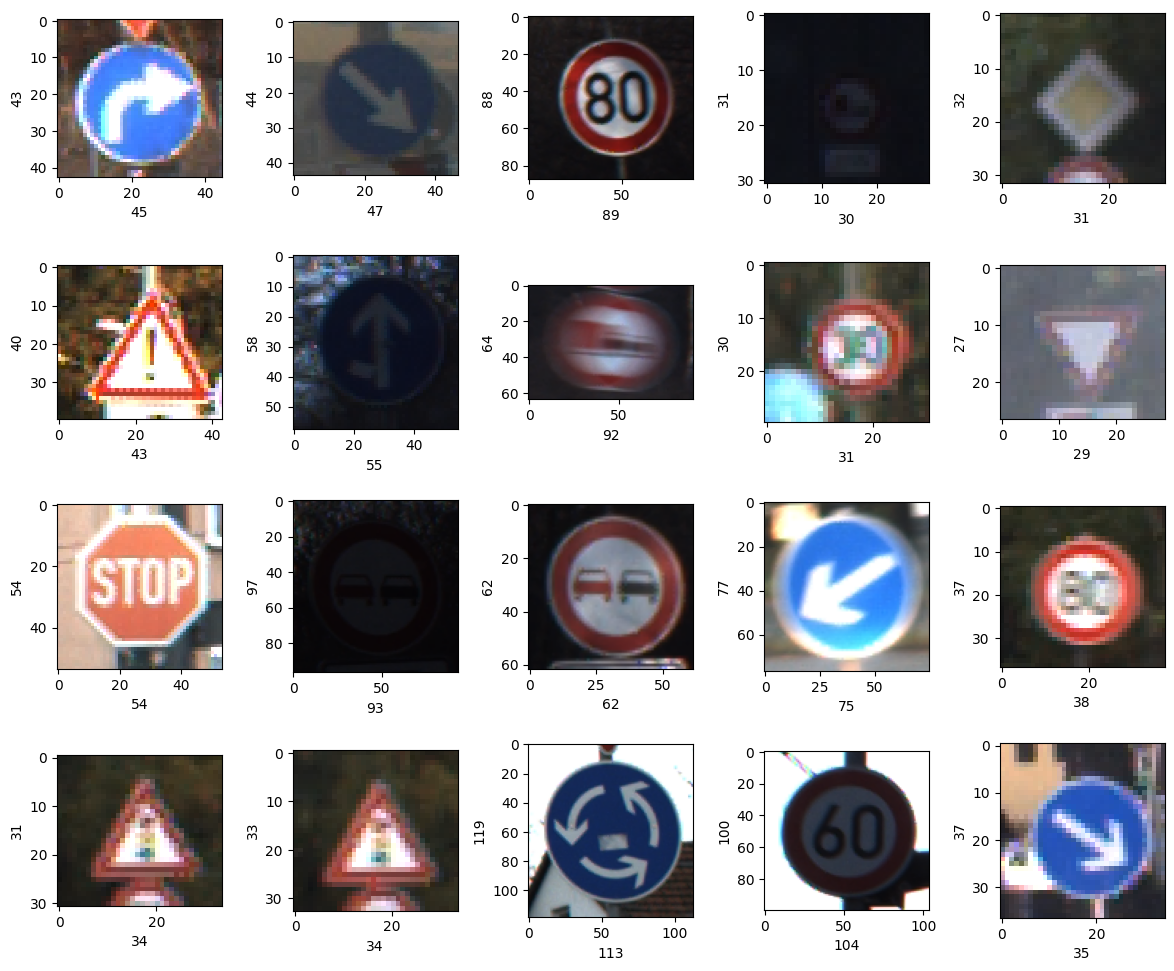

In [ ]:
#Ploatting 12 images to check datset
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,21):
  plt.subplot(5,5,i)
  plt.tight_layout()
  rand_img = imread(path + '/'+ random.choice(sorted(os.listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize=10)#width of image
  plt.ylabel(rand_img.shape[0], fontsize=10)#height of image

In [ ]:
#As size of Images are different we have to make them equal so we will take mean of dimensions.

dim1 = []
dim2 = []

for i in range(0,43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img= imread(labels + '/' + x)
    dim1.append(img.shape[0])
    dim2.append(img.shape[1])

In [ ]:
print("Dimension 1 Mean :" ,np.mean(dim1), "Dimension 2 Mean :" ,np.mean(dim2))

Dimension 1 Mean : 50.328929582493814 Dimension 2 Mean : 50.83587951745773


In [ ]:
# Now we will reshape the images to (50,50)
images = []
label_id= []

for i in range(43):
  labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
  image_path = os.listdir(labels)
  for x in image_path:
    img = Image.open(labels + '/' + x)
    img = img.resize((50,50))
    img = np.array(img)
    images.append(img)
    label_id.append(i)


In [ ]:
#Converting images into numpy array
images = np.array(images)
#The pixel value of each image ranges between 0 and 255
#Dividing each image by 255 will scale the values between 0 and 1. This is also known as normalization.
images = images/255

In [ ]:
label_id= np.array(label_id)
label_id.shape

(39209,)

In [ ]:
images.shape

(39209, 50, 50, 3)

In [ ]:
# Visualize the number of classes count
labels_counts = pd.DataFrame(label_id).value_counts()
labels_counts.head()

,count
0,
2,2250
1,2220
13,2160
12,2100
38,2070


In [ ]:
#Splitting the data
x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state= 42)

In [ ]:
#keras has a built-in function for one-hot encoding.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape = x_train.shape[1:], activation='relu', padding ='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 50, 50, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           5,547 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,035,627 (3.95 MB)

 Trainable params: 1,035,627 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 250s - 1s/step - accuracy: 0.3414 - loss: 2.3562 - val_accuracy: 0.6660 - val_loss: 1.1937
Epoch 2/10
246/246 - 257s - 1s/step - accuracy: 0.6376 - loss: 1.1393 - val_accuracy: 0.8878 - val_loss: 0.4908
Epoch 3/10
246/246 - 257s - 1s/step - accuracy: 0.7664 - loss: 0.7241 - val_accuracy: 0.9383 - val_loss: 0.2649
Epoch 4/10
246/246 - 244s - 994ms/step - accuracy: 0.8267 - loss: 0.5367 - val_accuracy: 0.9665 - val_loss: 0.1959
Epoch 5/10
246/246 - 256s - 1s/step - accuracy: 0.8549 - loss: 0.4442 - val_accuracy: 0.9731 - val_loss: 0.1340
Epoch 6/10
246/246 - 243s - 990ms/step - accuracy: 0.8760 - loss: 0.3812 - val_accuracy: 0.9758 - val_loss: 0.1036
Epoch 7/10
246/246 - 262s - 1s/step - accuracy: 0.8929 - loss: 0.3385 - val_accuracy: 0.9802 - val_loss: 0.0893
Epoch 8/10
246/246 - 237s - 965ms/step - accuracy: 0.9021 - loss: 0.3036 - val_accuracy: 0.9820 - val_loss: 0.0792
Epoch 9/10
246/246 - 245s - 994ms/step - accuracy: 0.9091 - loss: 0.2788 - val_accuracy: 0.9841

<Axes: >

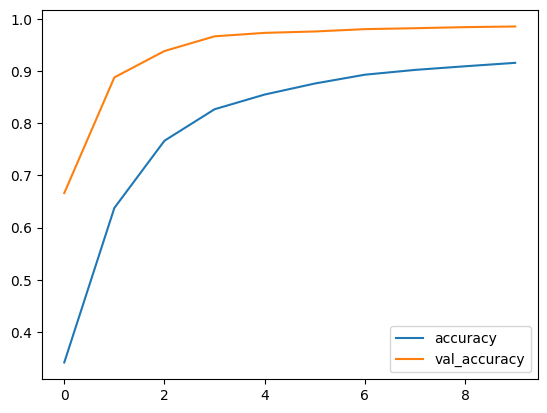

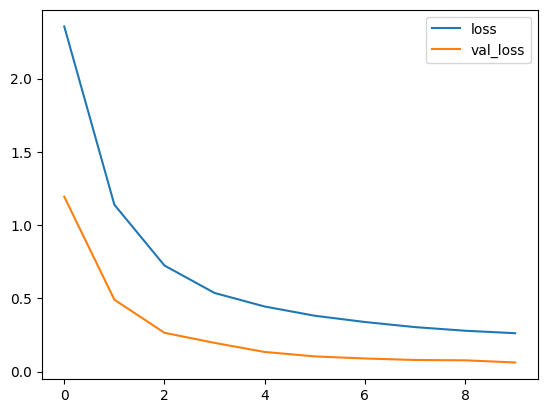

In [ ]:
evaluation= pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()


In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

In [ ]:
from PIL import Image
import numpy as np

def scaling(test_images, test_path):
    images = []  # Initialize the list to store the images

    for x in test_images:  # Loop through the list of image filenames
        img = Image.open(test_path + '/' + x)  # Open the image
        img = img.resize((50, 50))  # Resize the image to 50x50
        img = np.array(img)  # Convert the image to a NumPy array
        images.append(img)  # Append the array to the list

    # Convert the list of images into a NumPy array after the loop
    images = np.array(images)

    # Normalize the pixel values between 0 and 1
    images = images / 255.0
    return images


In [ ]:
test_images= scaling(sorted(os.listdir(test_path)), test_path)

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred = np.argmax(model.predict(test_images), axis=1)
y_pred

395/395 ━━━━━━━━━━━━━━━━━━━━ 23s 58ms/step


array([16,  1, 38, ..., 38,  7, 10])

In [ ]:
# Storing all labels
all_labels = [
    'Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)',
    'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)',
    'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing',
    'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection',
    'Priority road', 'Yield', 'Stop', 'No vehicles',
    'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution',
    'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve',
    'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work',
    'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing',
    'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits',
    'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right',
    'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory',
    'End of no passing', 'End of no passing by vehicles over 3.5 metric tons'
]

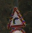

In [ ]:
img= Image.open(test_path + '/00017.png')
img

In [ ]:
#Original Label
print("Original label : ", all_labels[y_test[17]])

Original label :  Dangerous curve to the right


In [ ]:
#Predicted Label
print("Predicted label : ", all_labels[y_pred[17]])

Predicted label :  Dangerous curve to the right
